## Importing Libraries

In [1]:
import numpy as np #for working with arrays
import matplotlib.pyplot as plt #for data visualization
from sklearn.model_selection import train_test_split #for splitting the dataset into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix #performance metrics
import pandas as pd #for data manipulation and analysis

##Generating dataset

In [2]:
# Step 1: Data Generation
np.random.seed(42)  # For reproducibility

# Parameters
n_samples = 3000
n_features = 2
n_classes = 2

# Generate random samples for each class
n1 = np.random.randint(1000, 2000)  # Random number of samples in class 1
n2 = n_samples - n1  # Remaining samples in class 2

# Means and covariances for each class
mu1 = np.random.uniform(0, 1, 2)
mu2 = np.random.uniform(3, 4, 2)
cov1 = np.array([[1, 0.5],[0.5, 1]])
cov2 = np.array([[1, -0.5],[-0.5, 1]])

# Generate data for each class [X = inputs & y = Labels]
X_class1 = np.random.multivariate_normal(mu1, cov1, n1)  # Class 1
X_class2 = np.random.multivariate_normal(mu2, cov2, n2)  # Class 2

# Labels for Class 1 & 2
y_class1 = np.zeros(n1)
y_class2 = np.ones(n2)

print(f"Class sample sizes: n1 = {n1}, n2 = {n2}")
print("Shape of Input Data:")
print(f"X_class1: {X_class1.shape},\n X_class2: {X_class2.shape}")
print("Shape of Labels:")
print(f"y_class1: {y_class1.shape},\n y_class2: {y_class2.shape}")
print("Mean of Input Data:")
print(f"X_class1 Mean: {np.mean(X_class1, axis=0)},\n X_class2 Mean: {np.mean(X_class2, axis=0)}")
print("Covariance of Input Data:")
print(f"X_class1 Covariance:\n {np.cov(X_class1.T)},\n X_class2 Covariance:\n {np.cov(X_class2.T)}")


Class sample sizes: n1 = 1102, n2 = 1898
Shape of Input Data:
X_class1: (1102, 2),
 X_class2: (1898, 2)
Shape of Labels:
y_class1: (1102,),
 y_class2: (1898,)
Mean of Input Data:
X_class1 Mean: [0.75288683 0.19327365],
 X_class2 Mean: [3.78989204 3.60738571]
Covariance of Input Data:
X_class1 Covariance:
 [[1.01272444 0.50473865]
 [0.50473865 1.04591071]],
 X_class2 Covariance:
 [[ 0.99290031 -0.49550751]
 [-0.49550751  1.01004166]]


## Combining two data classes and their labels to form Data for Classification

In [3]:
X = np.vstack((X_class1, X_class2))  # Combined data from both classes
y = np.hstack((y_class1, y_class2))  # Combined labels from both classes
print(f"Shape of Input Data: {X.shape}")
print(f"Shape of Labels: {y.shape}")

Shape of Input Data: (3000, 2)
Shape of Labels: (3000,)


## Data Splitting

In [4]:
# Split the dataset into training and testing sets
s = np.random.uniform(0, 0.3)  # Random test set percentage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s, random_state=42)

# Print the shapes of the resulting sets
print(f"Shape of Training Data: {X_train.shape}")
print(f"Shape of Testing Data: {X_test.shape}")

Shape of Training Data: (2733, 2)
Shape of Testing Data: (267, 2)


## Data Visualization

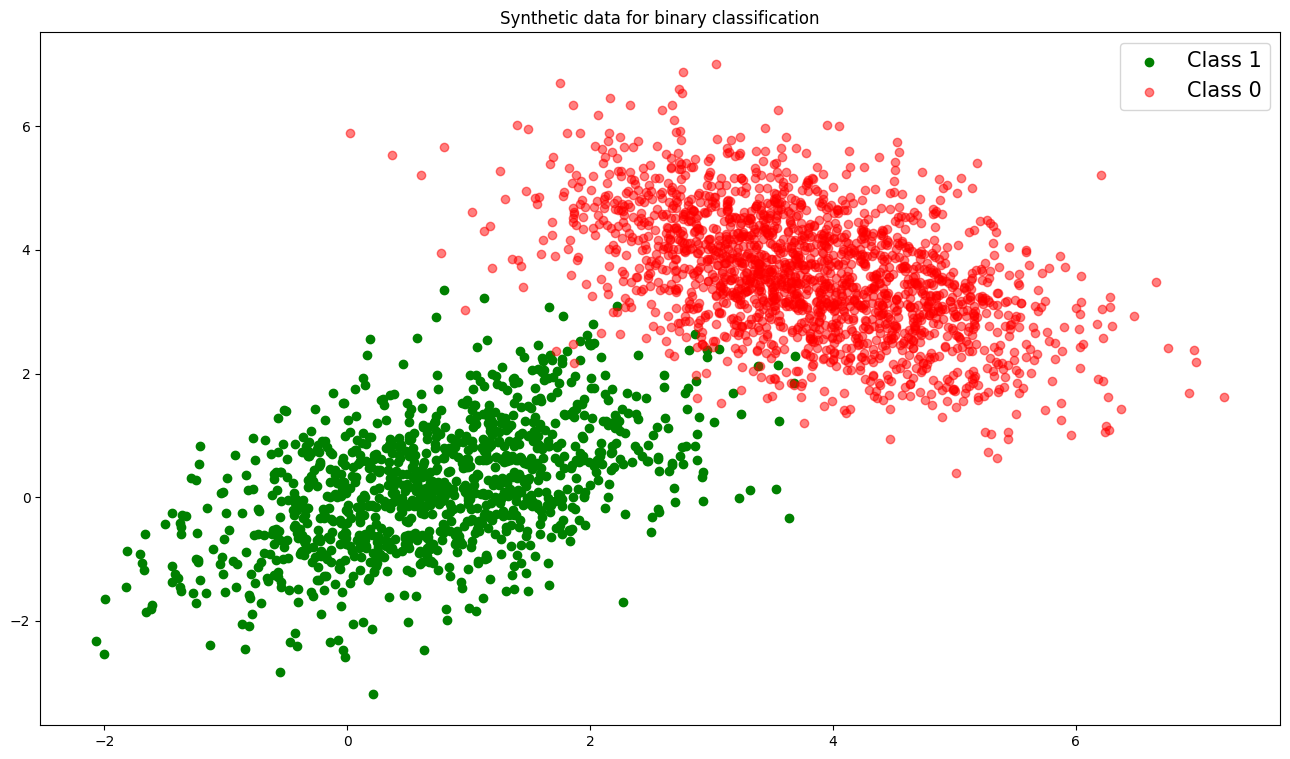

In [5]:
plt.figure(figsize = (16, 9))
plt.scatter(X_class1[:, 0], X_class1[:, 1], color = 'green', label = 'Class 1')
plt.scatter(X_class2[:, 0], X_class2[:, 1], color = 'red', alpha = 0.5, label ='Class 0')
plt.title('Synthetic data for binary classification')
plt.legend(fontsize = 15)
plt.show()

## LDA  and QDA

In [6]:
# Importing necessary library
import numpy as np

# Class for Linear Discriminant Analysis (LDA)
class LDA:
    # Method to train the LDA model
    def fit(self, X, y):
        # Get unique classes from labels and store them
        self.classes = np.unique(y)
        
        # Dictionaries to hold the mean vector and prior probability for each class
        self.means = {}
        self.priors = {}

        # Calculate mean vectors and prior probabilities for each class
        for cls in self.classes:
            # Extract data points belonging to the current class
            X_cls = X[y == cls]
            
            # Calculate and store the mean vector of the current class
            self.means[cls] = np.mean(X_cls, axis=0)
            
            # Calculate and store the prior probability of the current class
            self.priors[cls] = len(X_cls) / len(y)

        # Compute the covariance matrix across the entire dataset
        self.cov_matrix = np.cov(X, rowvar=False)
        
        # Calculate and store the inverse of the covariance matrix for later use
        self.inv_cov_matrix = np.linalg.inv(self.cov_matrix)

    # Method to make predictions for new data points
    def predict(self, X):
        predictions = []  # List to store predictions for each data point
        
        # Iterate over each data point to classify
        for x in X:
            scores = []  # List to hold scores for each class
            
            # Calculate the score for each class
            for cls in self.classes:
                # Difference between the data point and the mean of the current class
                mean_diff = x - self.means[cls]
                
                # Calculate the score based on the LDA formula
                score = (
                    -0.5 * mean_diff @ self.inv_cov_matrix @ mean_diff.T
                    + np.log(self.priors[cls])
                )
                
                # Append the calculated score for the current class
                scores.append(score)
            
            # Choose the class with the highest score as the prediction
            predictions.append(np.argmax(scores))
        
        # Return predictions as a NumPy array
        return np.array(predictions)

# Class for Quadratic Discriminant Analysis (QDA)
class QDA:
    # Method to train the QDA model
    def fit(self, X, y):
        # Get unique classes from labels and store them
        self.classes = np.unique(y)
        
        # Dictionaries to hold the mean vector, covariance matrix, and prior probability for each class
        self.means = {}
        self.cov_matrices = {}
        self.inv_cov_matrices = {}
        self.priors = {}

        # Calculate mean vectors, covariance matrices, and prior probabilities for each class
        for cls in self.classes:
            # Extract data points belonging to the current class
            X_cls = X[y == cls]
            
            # Calculate and store the mean vector of the current class
            self.means[cls] = np.mean(X_cls, axis=0)
            
            # Calculate and store the covariance matrix for the current class
            self.cov_matrices[cls] = np.cov(X_cls, rowvar=False)
            
            # Store the inverse of the covariance matrix for the current class
            self.inv_cov_matrices[cls] = np.linalg.inv(self.cov_matrices[cls])
            
            # Calculate and store the prior probability of the current class
            self.priors[cls] = len(X_cls) / len(y)

    # Method to make predictions for new data points
    def predict(self, X):
        predictions = []  # List to store predictions for each data point
        
        # Iterate over each data point to classify
        for x in X:
            scores = []  # List to hold scores for each class
            
            # Calculate the score for each class
            for cls in self.classes:
                # Difference between the data point and the mean of the current class
                mean_diff = x - self.means[cls]
                
                # Calculate the score based on the QDA formula
                score = (
                    -0.5 * np.log(np.linalg.det(self.cov_matrices[cls]))
                    - 0.5 * mean_diff @ self.inv_cov_matrices[cls] @ mean_diff.T
                    + np.log(self.priors[cls])
                )
                
                # Append the calculated score for the current class
                scores.append(score)
            
            # Choose the class with the highest score as the prediction
            predictions.append(np.argmax(scores))
        
        # Return predictions as a NumPy array
        return np.array(predictions)


## Training of LDA & QDA Model

In [7]:
lda_model = LDA()
lda_model.fit(X_train, y_train)

qda_model = QDA()
qda_model.fit(X_train, y_train)

## Predictions on Test set and Train set

In [8]:
lda_pred_test = lda_model.predict(X_test)
lda_pred_train = lda_model.predict(X_train)

qda_pred_test = qda_model.predict(X_test)
qda_pred_train = qda_model.predict(X_train)

##Model Evaluation

In [9]:
#LDA
# Test set
lda_test_cm = confusion_matrix(y_test, lda_pred_test)
lda_test_accuracy = accuracy_score(y_test, lda_pred_test)
#Train set
lda_train_cm = confusion_matrix(y_train, lda_pred_train)
lda_train_accuracy = accuracy_score(y_train, lda_pred_train)

#QDA
# Test set
qda_test_cm = confusion_matrix(y_test, qda_pred_test)
qda_test_accuracy = accuracy_score(y_test, qda_pred_test)
#Train set
qda_train_cm = confusion_matrix(y_train, qda_pred_train)
qda_train_accuracy = accuracy_score(y_train, qda_pred_train)

metrics_data = {
    "Model": ["LDA", "LDA", "QDA", "QDA"],
    "Dataset": ["Train", "Test", "Train", "Test"],
    "Confusion Matrix": [lda_train_cm, lda_test_cm, qda_train_cm, qda_test_cm],
    "Accuracy": [lda_train_accuracy, lda_test_accuracy, qda_train_accuracy, qda_test_accuracy]
}

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_data)

# Display the metrics table
print("LDA and QDA Metrics Comparison Table")
print(metrics_df)

# Compare LDA and QDA
print(f"LDA vs QDA Accuracy Comparison:")
if lda_test_accuracy > qda_test_accuracy:
    print("LDA has a higher accuracy.")
elif lda_test_accuracy < qda_test_accuracy:
    print("QDA has a higher accuracy.")
else:
    print("Both LDA and QDA have the same accuracy.")


LDA and QDA Metrics Comparison Table
  Model Dataset         Confusion Matrix  Accuracy
0   LDA   Train  [[888, 108], [0, 1737]]  0.960483
1   LDA    Test     [[96, 10], [0, 161]]  0.962547
2   QDA   Train   [[982, 14], [8, 1729]]  0.991950
3   QDA    Test     [[103, 3], [0, 161]]  0.988764
LDA vs QDA Accuracy Comparison:
QDA has a higher accuracy.


##Plotting the Results

In [10]:
def plot_results(model, X, y_true, y_pred, title):
    # Define the plot boundaries based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # X-axis range
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Y-axis range
    
    # Create a mesh grid over the feature space to visualize the decision boundary
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  # Reshape predictions to match the grid dimensions

    # Begin plotting the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Decision boundary in shaded regions

    # Classify data points by comparing true labels and predictions
    tp = (y_true == 1) & (y_pred == 1)  # True Positives
    tn = (y_true == 0) & (y_pred == 0)  # True Negatives
    fp = (y_true == 0) & (y_pred == 1)  # False Positives
    fn = (y_true == 1) & (y_pred == 0)  # False Negatives

    # Plot each type of point with different colors and markers for clear distinction
    plt.scatter(X[tp, 0], X[tp, 1], color='red', marker='o', edgecolor='k', label='True Positive', s=60, alpha=0.7)
    plt.scatter(X[tn, 0], X[tn, 1], color='blue', marker='o', edgecolor='k', label='True Negative', s=60, alpha=0.7)
    plt.scatter(X[fp, 0], X[fp, 1], color='green', marker='x', label='False Positive', s=80, alpha=0.9)
    plt.scatter(X[fn, 0], X[fn, 1], color='orange', marker='x', label='False Negative', s=80, alpha=0.9)

    # Add labels, title, and legend for clarity
    plt.title(title)
    plt.xlabel("Feature 1")  # Label for X-axis
    plt.ylabel("Feature 2")  # Label for Y-axis
    plt.legend(loc='upper right')  # Legend showing point classifications
    plt.show()  # Display the plot


##Training set plot

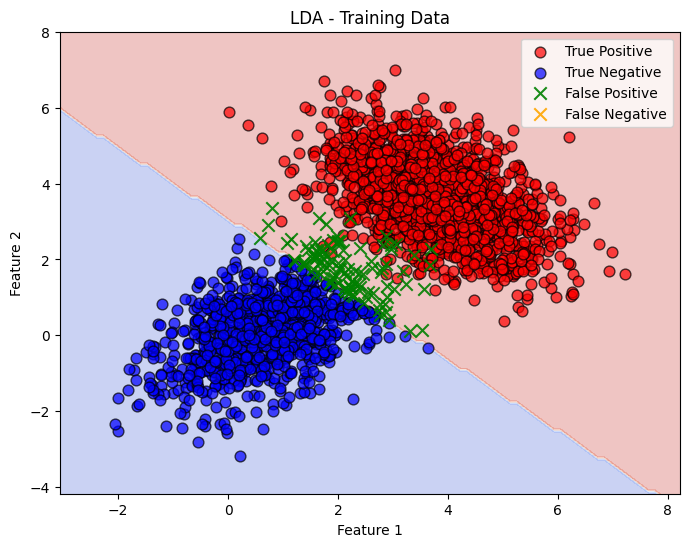

In [11]:
plot_results(lda_model, X_train, y_train, lda_pred_train, "LDA - Training Data")

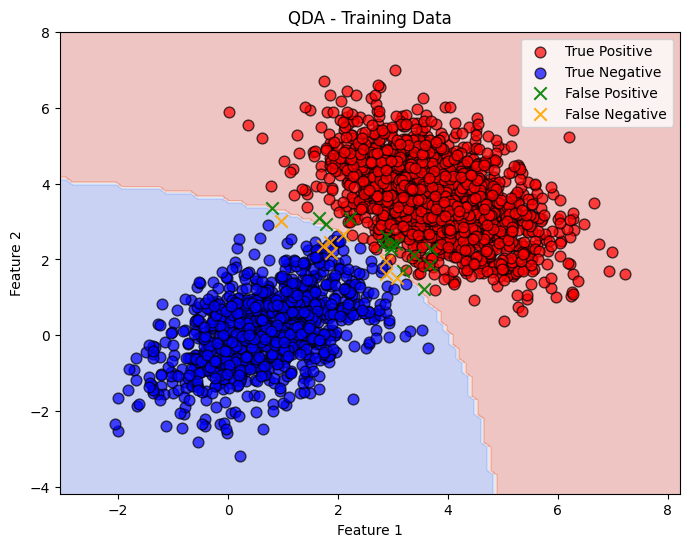

In [12]:
plot_results(qda_model, X_train, y_train, qda_pred_train, "QDA - Training Data")

##Test set Plot

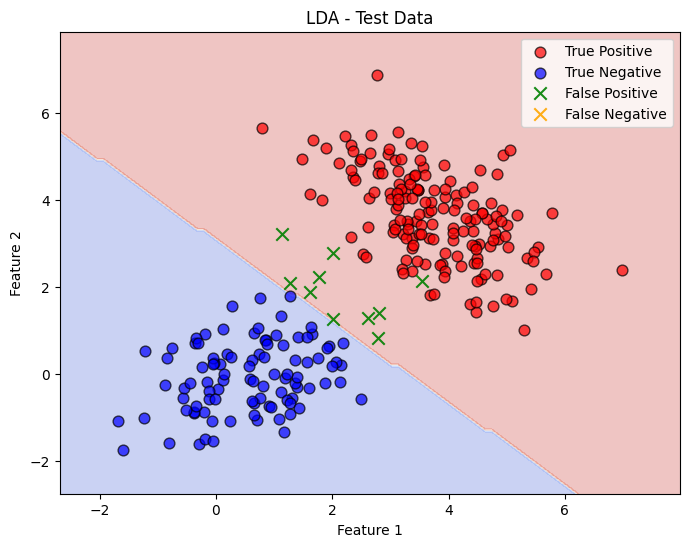

In [13]:
plot_results(lda_model, X_test, y_test, lda_pred_test, "LDA - Test Data")

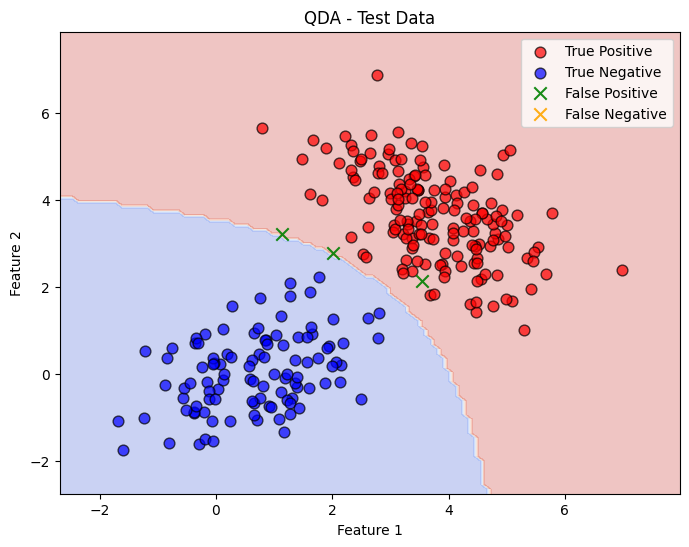

In [14]:
plot_results(qda_model, X_test, y_test, qda_pred_test, "QDA - Test Data")